# Correlation Matrix

In this script, we will:

1. Load and explore the dataset.
3. Compute correlation matrix to analyze relationships among features.  
4. Visualize correlations and interpret results.  

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

### Task 1: Load the CSV file

Load the dataset and take a quick look at its structure.  

In [10]:
# Load the CSV file
df = pd.read_csv("../ravdess_processed_data/combined_summary_updated.csv") 
# Preview the dataset (first few rows)
display(df.head())

,f0_mean,f0_stddev,f0_range,f1_mean,f1_stddev,f1_range,f2_mean,f2_stddev,f2_range,f3_mean,f3_stddev,f3_range,f4_mean,f4_stddev,f4_range,loudness_mean,loudness_stddev,loudness_range,hnr_mean,hnr_stddev,hnr_range,jitter,jitter_abs,jitter_rap,jitter_ppq5,jitter_ddp,shimmer,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,gne_ratio,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc1_var,mfcc2_var,mfcc3_var,mfcc4_var,mfcc5_var,mfcc6_var,mfcc7_var,mfcc8_var,mfcc9_var,mfcc10_var,mfcc11_var,mfcc12_var,mfcc13_var,mfcc14_var,cpp_mean,cpp_var,spir,dur_med,dur_mad,silence_ratio,rel_f0_sd,rel_se0_sd,anger_mean,disgust_mean,fear_mean,happiness_mean,sadness_mean,surprise_mean,neutral_mean,AU01_mean,AU02_mean,AU04_mean,AU05_mean,AU06_mean,AU07_mean,AU09_mean,AU10_mean,AU11_mean,AU12_mean,AU14_mean,AU15_mean,AU17_mean,AU20_mean,AU23_mean,AU24_mean,AU25_mean,AU26_mean,AU28_mean,AU43_mean,mouth_openness_mean,anger_std,disgust_std,fear_std,happiness_std,sadness_std,surprise_std,neutral_std,AU01_std,AU02_std,AU04_std,AU05_std,AU06_std,AU07_std,AU09_std,AU10_std,AU11_std,AU12_std,AU14_std,AU15_std,AU17_std,AU20_std,AU23_std,AU24_std,AU25_std,AU26_std,AU28_std,AU43_std,mouth_openness_std,condition,id,sex
0,187.954488,71.416690,237.048375,922.823132,468.613940,1996.040116,1901.817187,625.338642,3267.843008,3056.335186,464.281325,2950.746252,4117.979692,484.456216,2145.206728,32.053416,21.693051,75.419057,11.992046,5.162356,19.886876,0.024123,0.000128,0.010049,0.011579,0.030148,0.118589,1.285959,0.040294,0.068521,0.164227,0.120882,0.886951,-577.283508,50.809971,9.178207,7.829060,0.609486,3.173839,-9.146498,-6.220271,-3.913804,8.085999,-6.069926,1.263431,2.330363,3.273370,35890.644531,2507.516602,532.789429,532.708252,517.441528,391.328918,297.554382,135.891586,320.658936,146.112534,195.059540,96.941612,113.680801,72.005592,16.249489,17.036791,1.241465,1.0825,0.0195,61.764706,0.579976,0.110948,0.032439,0.068720,0.104196,0.307777,0.001349,0.390649,0.094870,0.376911,0.248547,0.380413,0.341828,0.812626,1.000000,0.421001,0.753236,0.750000,0.849302,0.640463,0.367619,0.354638,0.916667,0.331266,0.035762,0.995200,0.689270,0.024043,0.105458,57.261453,0.049035,0.145078,0.251764,0.296987,0.000776,0.350249,0.182315,0.212614,0.245659,0.212279,0.046204,0.119441,0.000000,0.178178,0.264554,0.452267,0.124431,0.153847,0.182735,0.140446,0.288675,0.167865,0.027854,0.012677,0.105102,0.023936,0.137085,14.985116,happy,19,male
1,125.649480,18.592790,76.282777,896.902975,451.287522,2158.738997,1955.646204,547.505858,2528.638337,2989.774860,538.940748,2531.004822,4085.873731,504.657913,2363.818158,26.617598,20.528256,94.676619,10.667778,5.374411,25.527881,0.024072,0.000191,0.009171,0.012456,0.027514,0.126087,1.139627,0.035972,0.059289,0.148916,0.107915,0.916357,-640.029480,70.087128,3.504848,17.908447,2.404655,1.247052,-0.443135,1.050410,-4.001191,2.263390,3.005612,-2.085797,2.423209,1.410431,38781.378906,2922.502441,839.126343,376.486023,360.336029,166.899902,289.893494,148.435410,226.767776,92.527451,92.031311,98.500801,40.201698,46.269871,NaN,NaN,1.355300,1.1075,0.0065,64.480874,0.529810,0.141170,0.000560,0.000700,0.004533,0.021139,0.003000,0.197913,0.772153,0.553059,0.383983,0.171147,0.387840,0.284825,0.000000,0.154061,0.143797,0.454545,0.202831,0.310190,0.169001,0.490456,0.545455,0.399031,0.132814,0.718501,0.529614,0.139122,0.092953,32.443400,0.000382,0.000650,0.006323,0.015656,0.002669,0.283295,0.296890,0.202772,0.183370,0.096275,0.051733,0.078799,0.000000,0.022640,0.157023,0.522233,0.125431,0.102439,0.069283,0.064586,0.522233,0.117064,0.181223,0.440511,0.322437,0.173739,0.039355,6.956635,calm,15,male
2,196.733026,59.763476,234.624127,807.336950,404.598851,1968.301265,1875.814368,424.990421,2902.265406,2966.456851,397.892303,3060.815697,3874.814408,422.468372,2413.436998,30.330253,29.256898,113.697231,7.087423,4.665763,22.103018,0.036305,0.000185,

### Task 2: Extract features

Define general info/ label columns and seperate them from features.

In [11]:
general_info_cols = ["id", "sex", "condition"]
df = df.drop(columns = general_info_cols)

### Task 3: Correlation Analysis  

A correlation matrix shows the pairwise relationships between variables, quantifying how strongly and in which direction they are related. It can be used to detect patterns, multicollinearity, or redundant features in data.  

Calculate correlation matrix using `pandas.DataFrame.corr()`


In [ ]:
# TODO: Calculate correlation matrices
corr_matrix = None


<details>
<summary><span style="font-size:20px; color:darkgoldenrod; font-weight:bold;">Click to see the solution</span></summary>

```python
corr_matrix = df.corr()

### Task 5: Visualizing Correlations  

Let's write a helper function to plot correlation heatmaps.  


In [13]:
# Write a function to plot correlation heatmaps
def plot_corr(corr_matrix, title, figsize=(12,10)):
    """
    Plot a heatmap of the correlation matrix

    Args:
        corr_matrix (DataFrame): Correlation matrix to plot
        title (str): Title for the heatmap

    Returns:
        None, displays the heatmap plot
    """
    try: 
        plt.figure(figsize=figsize)
        sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
        plt.title(title)
        plt.show()
    except Exception as e:
        print(f"[Warning] Could not plot")
        print("Most likely the code is not yet complete (complete the cells with TODO).")
    


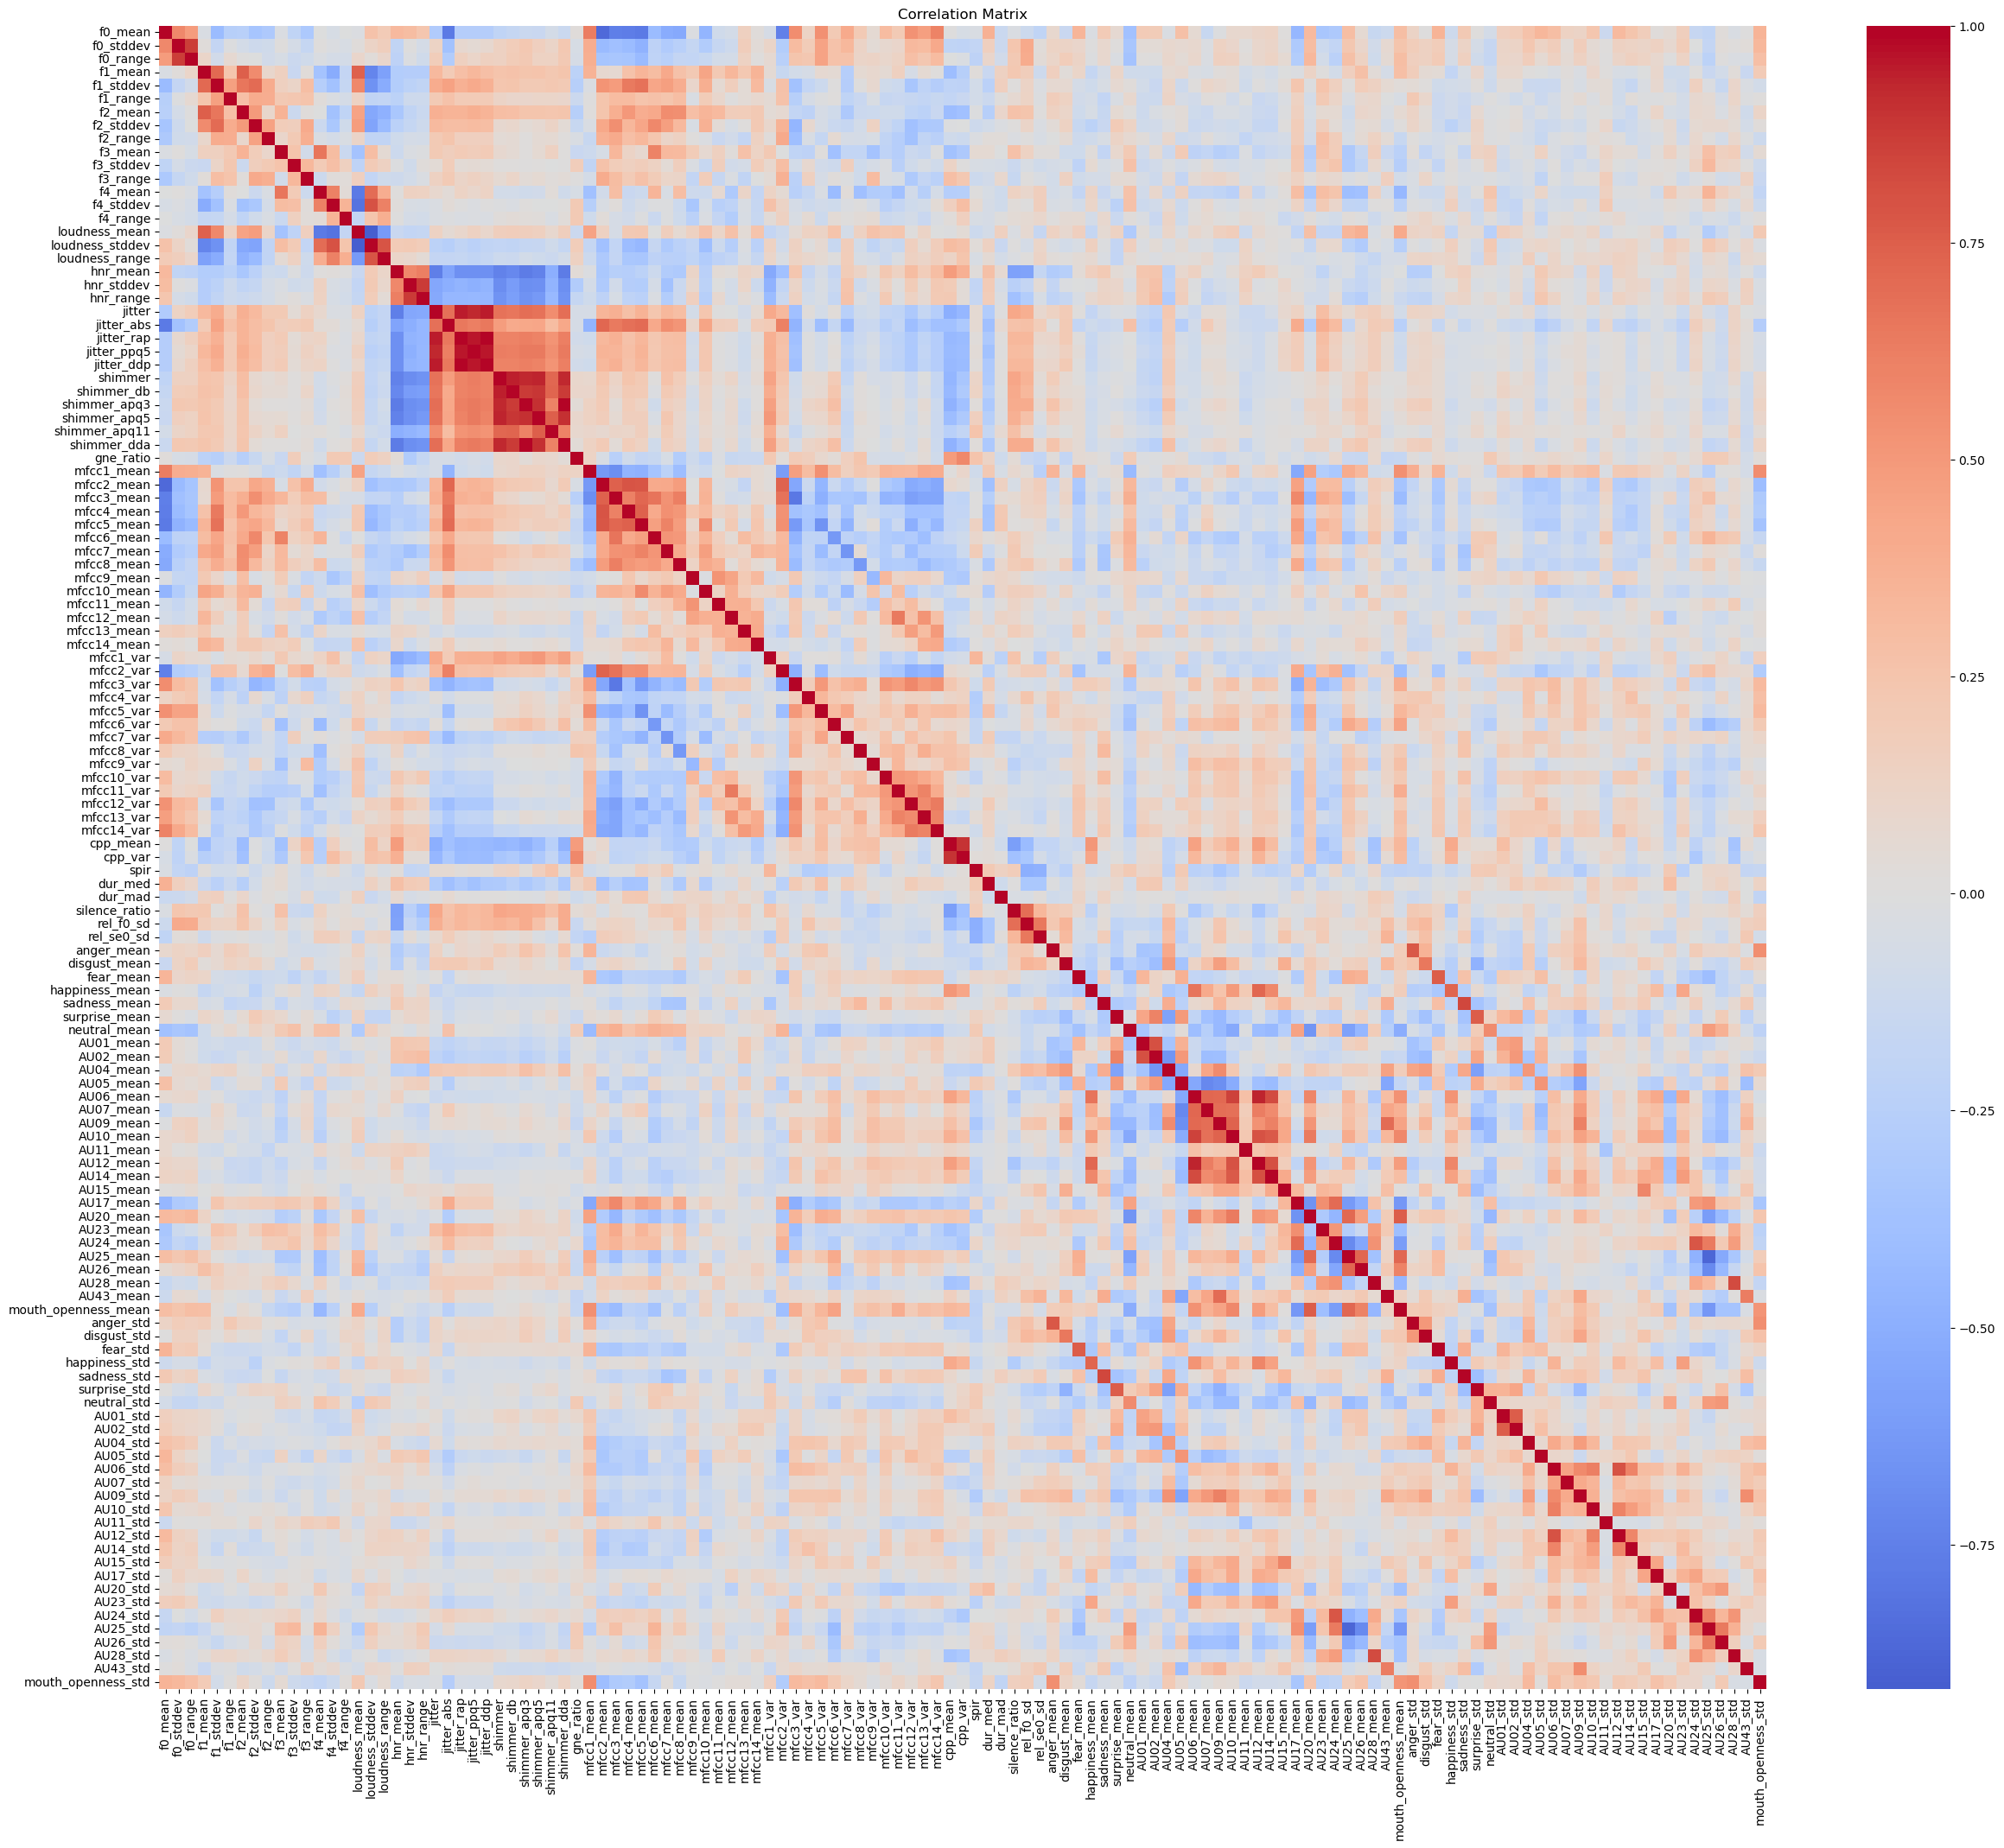

In [14]:
plot_corr(corr_matrix, "Correlation Matrix", figsize=(30,25))

### Task 6: Finding Strongest Correlations

As the correlation matrix is very large, it is  difficult to analyse directly.

👉 To simplify, we will write a helper function that extracts n strongest positive and strongest negative correlations.

In [15]:
def top_correlations(corr_matrix, top_n=5):
    """
    Get the top N positive and negative correlations from a correlation matrix

    Args:
        corr_matrix (pd.DataFrame): A square correlation matrix
        top_n (int, optional): Number of strongest positive and negative correlations to return

    Returns:
        tuple[pd.Series, pd.Series]:
            - strong_pos (pd.Series): The top N strongest positive correlations, sorted descending
            - strong_neg (pd.Series): The top N strongest negative correlations, sorted ascending
    """

    try:
        # Mask lower triangle including diagonal to get unique correlations
        mask = np.tril(np.ones(corr_matrix.shape), k=0).astype(bool)
        upper_tri = corr_matrix.where(~mask)
        
        # Strongest positive correlations
        strong_pos = upper_tri[upper_tri > 0].stack().sort_values(ascending=False).head(top_n)
        
        # Strongest negative correlations
        strong_neg = upper_tri[upper_tri < 0].stack().sort_values(ascending=True).head(top_n)
    
        return strong_pos, strong_neg
    except Exception as e:
        print(f"[Warning] Could not plot")
        print("Most likely the code is not yet complete (complete the cells with TODO).\n")
        return None, None

In [16]:
pos_corr, neg_corr = top_correlations(corr_matrix, top_n=15)
print('Top Positive Correlations:')
display(pos_corr)

print('Top Negative Correlations:')
display(neg_corr)


Top Positive Correlations:


jitter_rap    jitter_ddp      1.000000
shimmer_apq3  shimmer_dda     1.000000
jitter_rap    jitter_ppq5     0.955652
jitter_ppq5   jitter_ddp      0.955652
jitter        jitter_ddp      0.953951
              jitter_rap      0.953951
shimmer       shimmer_db      0.947566
              shimmer_apq5    0.935641
AU06_mean     AU12_mean       0.935354
jitter        jitter_ppq5     0.928911
shimmer       shimmer_apq3    0.926420
              shimmer_dda     0.926420
shimmer_apq3  shimmer_apq5    0.909020
shimmer_apq5  shimmer_dda     0.909020
cpp_mean      cpp_var         0.902572
dtype: float64

Top Negative Correlations:


loudness_mean  loudness_stddev   -0.916324
AU25_mean      AU25_std          -0.871639
f0_mean        mfcc2_mean        -0.861033
f4_stddev      loudness_mean     -0.813148
mfcc3_mean     mfcc3_var         -0.791178
f0_mean        mfcc5_mean        -0.786530
               jitter_abs        -0.786003
f4_mean        loudness_mean     -0.785193
hnr_mean       shimmer_apq3      -0.775634
               shimmer_dda       -0.775634
f0_mean        mfcc4_mean        -0.759182
               mfcc3_mean        -0.756696
hnr_mean       jitter            -0.752347
f0_mean        mfcc2_var         -0.750158
hnr_mean       shimmer           -0.741844
dtype: float64

### Insights?

🔍 Which features can be considered redundant?   

📊 Which features are highly correlated (positively or negatively)? 

🤔 Are there any correlations that are particularly interesting?